In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from numpy import array
import hvplot.pandas


In [2]:
csv_path_1= Path("Resources/2023_national_park_public_data.csv")
csv_path_2=Path("Resources/national_park_names.csv")

national_parks_complete_df= pd.read_csv(csv_path_1)
location_data_df = pd.read_csv(csv_path_2)

national_parks_complete_df.head()

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,...,NonRecreationVisitsTotal,RecreationHoursTotal,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal
0,Acadia NP,ACAD,National Park,Northeast,ME,2023,1,"15,217",600,"100,434",...,"47,100","25,804,425","47,100",0,"1,603","120,615","49,074","1,570",0,"9,600"
1,Acadia NP,ACAD,National Park,Northeast,ME,2023,2,"15,281",600,"100,853",...,"47,100","25,804,425","47,100",0,"1,603","120,615","49,074","1,570",0,"9,600"
2,Acadia NP,ACAD,National Park,Northeast,ME,2023,3,"30,822",600,"203,428",...,"47,100","25,804,425","47,100",0,"1,603","120,615","49,074","1,570",0,"9,600"
3,Acadia NP,ACAD,National Park,Northeast,ME,2023,4,"102,928",600,"596,982",...,"47,100","25,804,425","47,100",0,"1,603","120,615","49,074","1,570",0,"9,600"
4,Acadia NP,ACAD,National Park,Northeast,ME,2023,5,"340,425","7,500","2,369,803",...,"47,100","25,804,425","47,100",0,"1,603","120,615","49,074","1,570",0,"9,600"


In [3]:
location_data_df.head()

,Park Name,Lat,Lon
0,Acadia National Park,44.338974,-68.273430
1,Arches National Park,38.733082,-109.592514
2,Badlands National Park,43.855400,-102.339700
3,Big Bend National Park,29.249800,-103.250200
4,Biscayne National Park,25.500300,-80.182800


In [4]:
# Remove unnecessary columns from the DataFrame and save the new DataFrame
national_parks_reduced_df=national_parks_complete_df[["ParkName","Region", "State","Month","RecreationVisits","RecreationHours","RecreationHoursTotal"]]


In [5]:
# Rename headers
national_parks_headers_renamed_df= national_parks_reduced_df.rename(columns={"ParkName":"Park Name",
                                                                    "RecreationVisits":"Recreation Visits by Month",
                                                                    "RecreationHours":"Recreation Hours by Month",
                                                                    "RecreationHoursTotal":"Total Recreation Hours"})


In [6]:
# Rename Park Name to show the official Name of the National Park which is documented in csv_path_2=Path("Resources/national_park_names.csv")
national_parks_rows_renamed_df=national_parks_headers_renamed_df.replace({"Acadia NP":"Acadia National Park",
                                                                          "Arches NP":"Arches National Park",
                                                                          "Badlands NP":"Badlands National Park",
                                                                          "Big Bend NP":"Big Bend National Park",
                                                                          "Biscayne NP":"Biscayne National Park",
                                                                          "Black Canyon of the Gunnison NP":"Black Canyon of the Gunnison National Park",
                                                                          "Bryce Canyon NP":"Bryce Canyon National Park",
                                                                          "Canyonlands NP":"Canyonlands National Park",
                                                                          "Capitol Reef NP":"Capitol Reef National Park",
                                                                          "Carlsbad Caverns NP":"Carlsbad Caverns National Park",
                                                                          "Channel Islands NP":"Channel Islands National Park",
                                                                          "Congaree NP":"Congaree National Park",
                                                                          "Crater Lake NP":"Crater Lake National Park",
                                                                          "Cuyahoga Valley NP":"Cuyahoga Valley National Park",
                                                                          "Death Valley NP":"Death Valley National Park",
                                                                          "Denali NP":"Denali & PRES National Park",
                                                                          "Dry Tortugas NP":"Dry Tortugas National Park",
                                                                          "Everglades NP":"Everglades National Park",
                                                                          "Gates of the Arctic NP":"Gates of the Arctic & PRES National Park",
                                                                          "Gateway Arch NP":"Gateway Arch National Park",
                                                                          "Glacier Bay NP":"Glacier Bay & PRES National Park",
                                                                          "Glacier NP":"Glacier National Park",
                                                                          "Grand Canyon NP":"Grand Canyon National Park",
                                                                          "Grand Teton NP":"Grand Teton National Park",
                                                                          "Great Basin NP":"Great Basin National Park",
                                                                          "Great Sand Dunes NP":"Great Sand Dunes & PRES National Park",
                                                                          "Great Smoky Mountains NP":"Great Smoky Mountains National Park",
                                                                          "Guadalupe Mountains NP":"Guadalupe Mountains National Park",
                                                                          "Haleakala NP":"Haleakala National Park",
                                                                          "Hawaii Volcanoes NP":"Hawaii Volcanoes National Park",
                                                                          "Hot Springs NP":"Hot Springs National Park",
                                                                          "Indiana Dunes NP":"Indiana Dunes National Park",
                                                                          "Isle Royale NP":"Isle Royale National Park",
                                                                          "Joshua Tree NP":"Joshua Tree National Park",
                                                                          "Katmai NP":"Katmai & PRES National Park",
                                                                          "Kenai Fjords NP":"Kenai Fjords National Park",
                                                                          "Kings Canyon NP":"Kings Canyon National Park",
                                                                          "Kobuk Valley NP":"Kobuk Valley National Park",
                                                                          "Lake Clark NP":"Lake Clark & PRES National Park",
                                                                          "Lassen Volcanic NP":"Lassen Volcanic National Park",
                                                                          "Mammoth Cave NP":"Mammoth Cave National Park",
                                                                          "Mesa Verde NP":"Mesa Verde National Park",
                                                                          "Mount Rainier NP":"Mount Rainier National Park",
                                                                          "National Park of American Samoa":"American Samoa National Park",
                                                                          "New River Gorge NP":"New River Gorge & PRES National Park",
                                                                          "North Cascades NP":"North Cascades National Park",
                                                                          "Olympic NP":"Olympic National Park",
                                                                          "Petrified Forest NP":"Petrified Forest National Park",
                                                                          "Pinnacles NP":"Pinnacles National Park",
                                                                          "Redwood NP":"Redwood National Park",
                                                                          "Rocky Mountain NP":"Rocky Mountain National Park",
                                                                          "Saguaro NP":"Saguaro National Park",
                                                                          "Sequoia NP":"Sequoia National Park",
                                                                          "Shenandoah NP":"Shenandoah National Park",
                                                                          "Theodore Roosevelt NP":"Theodore Roosevelt National Park",
                                                                          "Virgin Islands NP":"Virgin Islands National Park",
                                                                          "Voyageurs NP":"Voyageurs National Park",
                                                                          "White Sands NP":"White Sands National Park",
                                                                          "Wind Cave NP":"Wind Cave National Park",
                                                                          "Wrangell-St. Elias NP":"Wrangell-St. Elias & PRES National Park",
                                                                          "Yellowstone NP":"Yellowstone National Park",
                                                                          "Yosemite NP":"Yosemite National Park",
                                                                          "Zion NP":"Zion National Park",})

In [7]:
# Renamed the abbreviations for the State with the entire name of the state
national_parks_rows_renamed_df=national_parks_rows_renamed_df.replace({"AK": "Alaska",
                       "AR": "Arizona",
                       "AS": "American Samoa",
                       "AZ": "Arizona",
                       "CA": "California",
                       "CO": "Colorado",
                       "FL": "Florida",
                       "HI": "Hiawaii",
                       "IN": "Indiana",
                       "KY": "Kentucky",
                       "ME": "Maine",
                       "MI": "Michigan",
                       "MN": "Minnesota",
                       "MO": "Missouri",
                       "MT": "Montana",
                       "ND": "North Dakota",
                       "NM": "New Mexico",
                       "NV": "Nevada",
                       "OH": "Ohio",
                       "OR": "Oregon",
                       "SC": "South Carolina",
                       "SD": "South Dakota",
                       "TN": "Tennessee",
                       "TX": "Texas",
                       "UT": "Utah",
                       "VA": "Virginia",
                       "VI": "Virgin Islands",
                       "WA": "Washington",
                       "WV": "West Virginia",
                       "WY": "Wyoming"
                      })       


In [8]:
# Renamed the number of the month to the name of the month
month_names={1:"Jan", 2:"Feb", 3:"Mar", 4:"April", 5:"May", 6:"June", 7:"July", 8:"Aug", 9:"Sept", 10:"Oct", 11:"Nov", 12:"Dec"}

national_parks_rows_renamed_df['Month']=national_parks_rows_renamed_df['Month'].replace(month_names)

national_parks_rows_renamed_df["Recreation Hours by Month"] = national_parks_rows_renamed_df["Recreation Hours by Month"].str.replace(",","").astype(float)
national_parks_rows_renamed_df["Recreation Visits by Month"] = national_parks_rows_renamed_df["Recreation Visits by Month"].str.replace(",","").astype(float)
national_parks_rows_renamed_df["Total Recreation Hours"] = national_parks_rows_renamed_df["Total Recreation Hours"].str.replace(",","").astype(float)


In [9]:
# Create a new column for "Average Time Spent per Visit" and calculate
                                                                         
national_parks_rows_renamed_df["Average Time Spent per Visit"] = national_parks_rows_renamed_df["Recreation Hours by Month"] /national_parks_rows_renamed_df["Recreation Visits by Month"]


In [10]:
# Merge the DataFrames on a common column
merged_df = pd.merge(national_parks_rows_renamed_df, location_data_df, on='Park Name', how='left')

merged_df.head(13)

,Park Name,Region,State,Month,Recreation Visits by Month,Recreation Hours by Month,Total Recreation Hours,Average Time Spent per Visit,Lat,Lon
0,Acadia National Park,Northeast,Maine,Jan,15217.0,100434.0,25804425.0,6.600118,44.338974,-68.273430
1,Acadia National Park,Northeast,Maine,Feb,15281.0,100853.0,25804425.0,6.599895,44.338974,-68.273430
2,Acadia National Park,Northeast,Maine,Mar,30822.0,203428.0,25804425.0,6.600091,44.338974,-68.273430
3,Acadia National Park,Northeast,Maine,April,102928.0,596982.0,25804425.0,5.799996,44.338974,-68.273430
4,Acadia National Park,Northeast,Maine,May,340425.0,2369803.0,25804425.0,6.961307,44.338974,-68.273430
5,Acadia National Park,Northeast,Maine,June,566535.0,4257742.0,25804425.0,7.515409,44.338974,-68.273430
6,Acadia National Park,Northeast,Maine,July,767956.0,5059220.0,25804425.0,6.587903,44.338974,-68.273430
7,Acadia National Park,Northeast,Maine,Aug,774296.0,5042016.0,25804425.0,6.511742,44.338974,-68.273430
8,Acadia National Park,Northeast,Maine,Sept,643506.0,4027568.0,25804425.0,6.258789,44.338974,-68.273430
9,Acadia National Park,Northeast,Maine,Oct,541067.0,3555236.0,25804425.0,6.570787,44.338974,-68.273430


In [11]:
#SAVI
# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

#group the dataframe for Geo Map
geo_summary_df=merged_df.groupby(["Lat","Lon"]).agg({"Region": np.unique, "Park Name": np.unique, "State": np.unique, "Recreation Visits by Month": np.sum, "Recreation Hours by Month": np.sum})

# Create a column and calculation for % of Recreation Visits
geo_summary_df["% of Recreation Visits"] = (round( (geo_summary_df["Recreation Visits by Month"]/geo_summary_df["Recreation Visits by Month"].sum()) * 100,2))


In [12]:
# Plot Map for visual
map_plot_1 = geo_summary_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 1300,
    frame_height = 800,
    title= "National Parks in the US",
    size = "Recreation Visits by Month",
    scale = 0.015,
    color = "% of Recreation Visits" 
)
# Display the map plot
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (% of Recreation Visits,Recreation Visits by Month)

In [13]:
# Create variable for Bar graph to show Counts of Parks by Region
regionbar=merged_df["Region"].value_counts()/12
regionbar

Region
Intermountain     20.0
Pacific West      17.0
Midwest            9.0
Alaska             8.0
Southeast          7.0
Northeast          3.0
Name: count, dtype: float64

Text(0, 0.5, 'Count of Parks by Region')

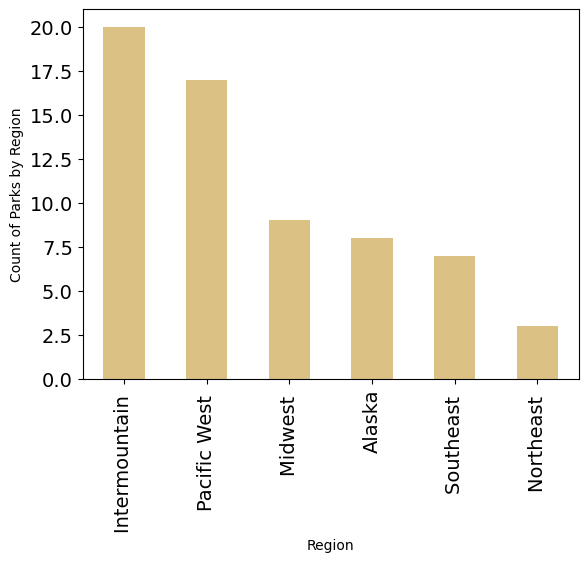

In [27]:
# Create the visual and plot regionbar
regionbar.plot(kind="bar", color="darkgoldenrod",alpha=0.5, align="center", fontsize=14
            )
plt.ylabel("Count of Parks by Region")

In [30]:
# Create variable for Bar graph to show Counts of Parks by State
statebar=merged_df["State"].value_counts()/12
statebar

State
California        9.0
Alaska            8.0
Utah              6.0
Arizona           4.0
Colorado          4.0
Washington        3.0
Florida           3.0
Wyoming           2.0
Hiawaii           2.0
New Mexico        2.0
Texas             2.0
South Dakota      2.0
Michigan          1.0
Virginia          1.0
Virgin Islands    1.0
West Virginia     1.0
American Samoa    1.0
Kentucky          1.0
North Dakota      1.0
Maine             1.0
Indiana           1.0
Tennessee         1.0
Nevada            1.0
Montana           1.0
Missouri          1.0
Ohio              1.0
Oregon            1.0
South Carolina    1.0
Minnesota         1.0
Name: count, dtype: float64

Text(0, 0.5, 'Count of Parks by State')

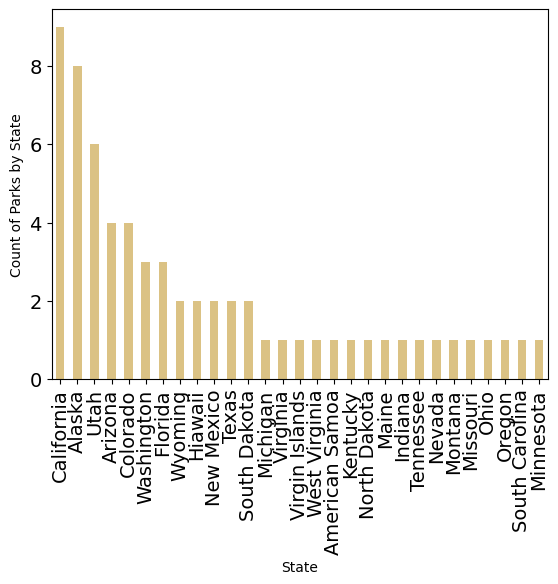

In [16]:
# Create the visual and plot statebar
statebar.plot(kind="bar",color="darkgoldenrod",alpha=0.5, align="center", fontsize=14)
plt.ylabel("Count of Parks by State")

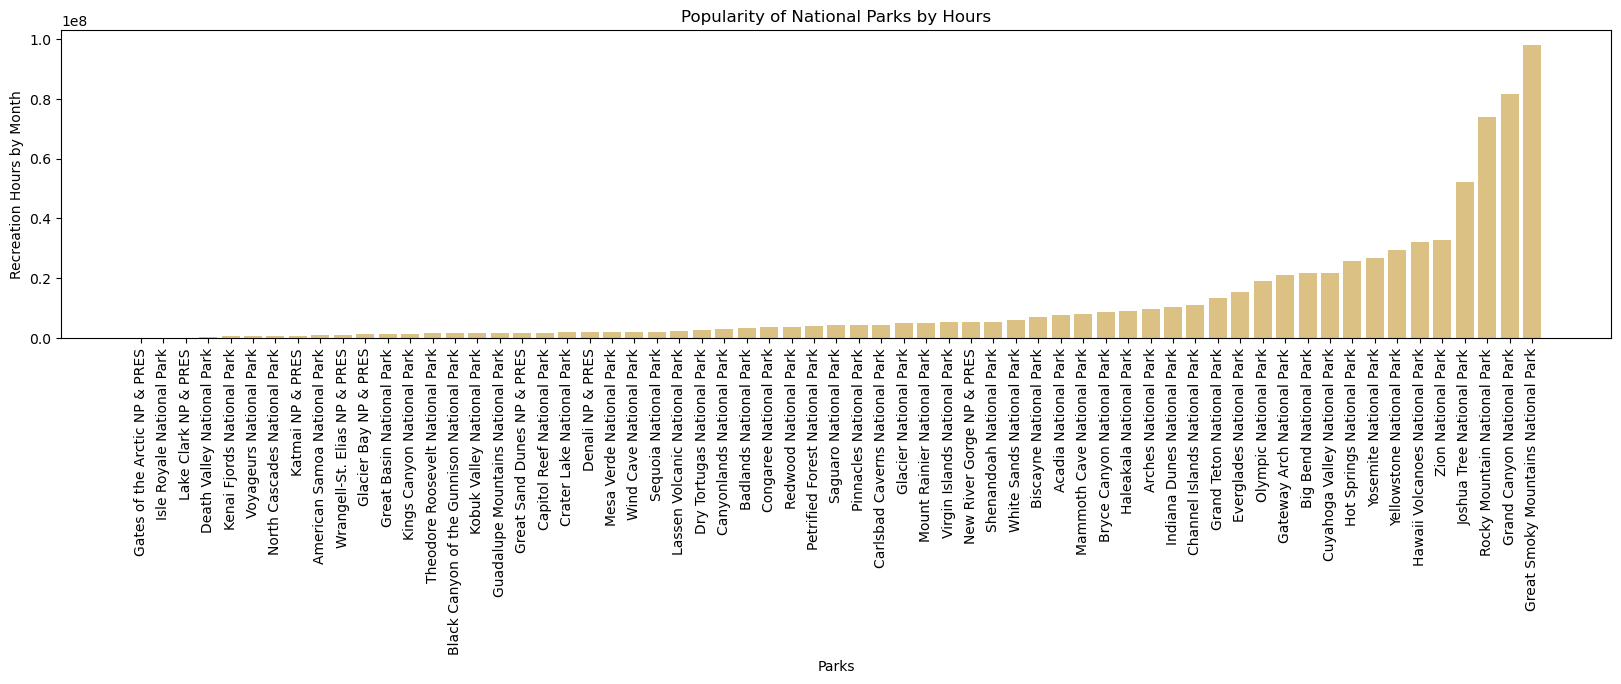

In [57]:
#MADDIE
#Popularity of Park by Total Hours
#Create a smaller dataframe with only Park Name and Total Recreation Hours, and group by Park Name
pre_sorted = national_parks_rows_renamed_df[['Park Name','Recreation Hours by Month']]
shortened = pre_sorted.sort_values('Recreation Hours by Month')
hours_by_park = pre_sorted.groupby(['Park Name']).sum()
sorted = hours_by_park.sort_values('Recreation Hours by Month')

a_axis_temp = shortened['Park Name'].unique()
hours_by_park.head()

#Create a list of the Park Names
x_axis = national_parks_rows_renamed_df['Park Name'].unique()
x_axis_list = a_axis_temp.tolist()

#Plot the graph
plt.figure(figsize=(20,4))
plt.bar(x_axis_list, sorted["Recreation Hours by Month"], color='darkgoldenrod', alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in range(len(x_axis))]
plt.xticks(tick_locations, x_axis_list, rotation="vertical")
plt.tight_layout
plt.xlabel('Parks')
plt.ylabel('Recreation Hours by Month')
plt.title('Popularity of National Parks by Hours')

plt.show()

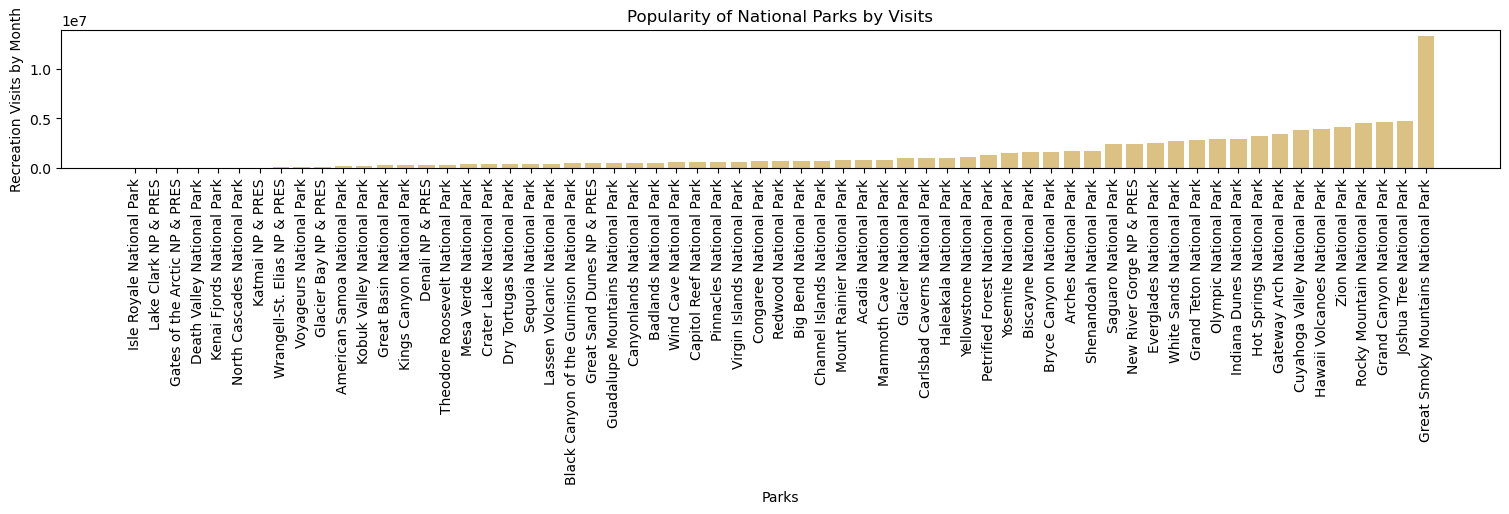

In [56]:
#Popularity of Park by Total Visits
#Create a smaller dataframe with only Park Name and Total Recreation Hours, and group by Park Name
pre_sorted = national_parks_rows_renamed_df[['Park Name','Recreation Visits by Month']]
shortened = pre_sorted.sort_values('Recreation Visits by Month')
hours_by_park = pre_sorted.groupby(['Park Name']).sum()
sorted = hours_by_park.sort_values('Recreation Visits by Month')

a_axis_temp = shortened['Park Name'].unique()
hours_by_park.head()

#Create a list of the Park Names
x_axis = national_parks_rows_renamed_df['Park Name'].unique()
x_axis_list = a_axis_temp.tolist()

#Plot the graph
plt.figure(figsize=(15,5))
plt.bar(x_axis_list, sorted["Recreation Visits by Month"], color='darkgoldenrod', alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in range(len(x_axis))]
plt.xticks(tick_locations, x_axis_list, rotation="vertical")
plt.tight_layout()
plt.xlabel('Parks')
plt.ylabel('Recreation Visits by Month')
plt.title('Popularity of National Parks by Visits')

plt.show()

In [19]:
#Create a conditional statement to sort the months into seasons
def get_season(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'Aug']:
        return 'Summer'
    else:
        return 'Fall'

merged_df['seasons'] = merged_df['Month'].apply(get_season)

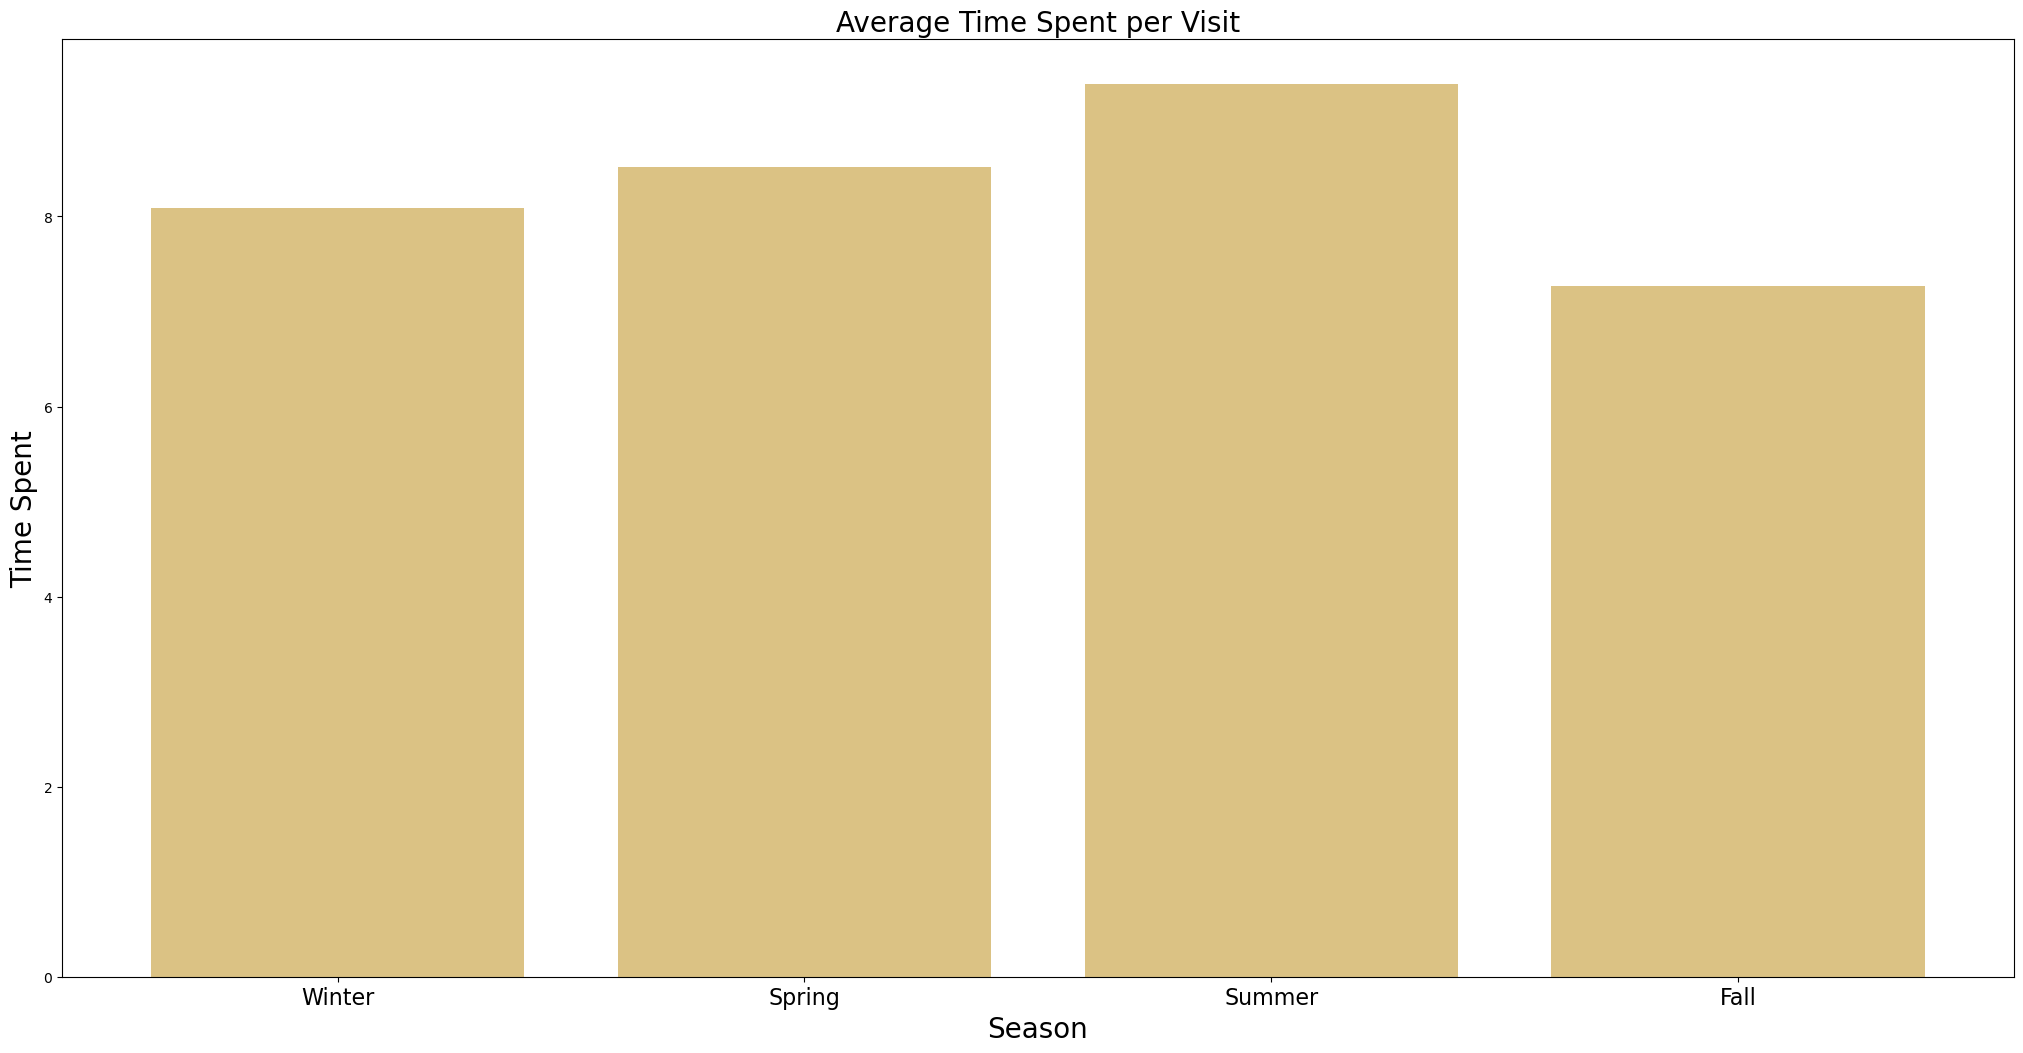

In [53]:
#DANIEL
seasons_df = merged_df.groupby("seasons")["Average Time Spent per Visit"].mean()
seasons_df.head()

x_axis = merged_df['seasons'].unique()
x_axis_list = x_axis.tolist()
y_axis = seasons_df

tick_locations = [i + 0.4 for i in range(len(x_axis_list))]
plt.figure(figsize=(20,10))
plt.bar(x_axis_list, y_axis, color='darkgoldenrod', alpha=0.5, align='edge')

plt.xticks(tick_locations, x_axis, rotation='horizontal', fontsize=16)
plt.tight_layout()
plt.title("Average Time Spent per Visit", fontsize=20)
plt.xlabel("Season", fontsize=20)
plt.ylabel("Time Spent", fontsize=20)

plt.show()

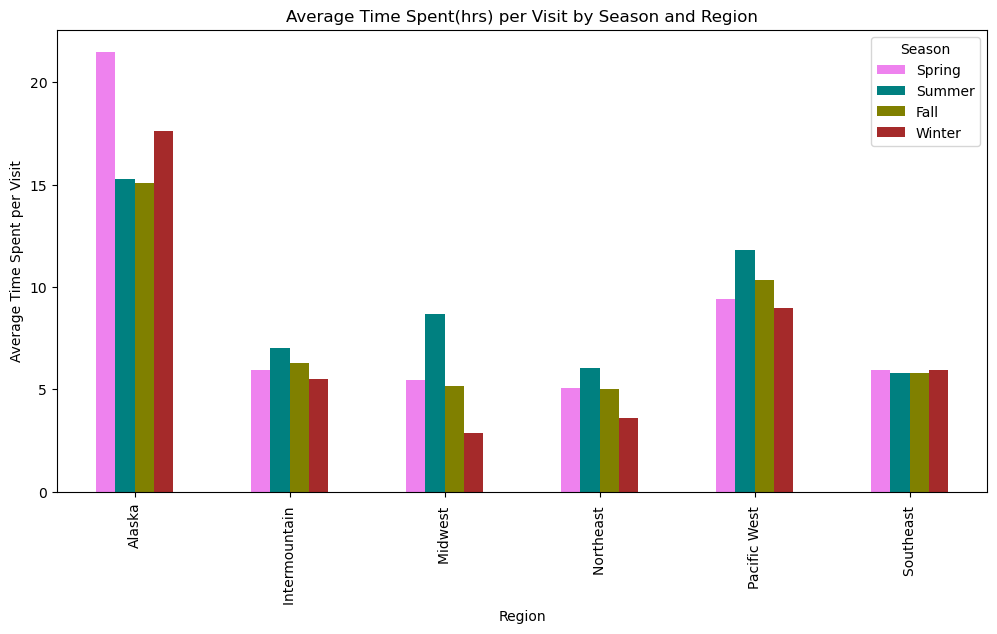

In [28]:
spring_df = merged_df.loc[merged_df["seasons"] == "Spring"]
summer_df = merged_df.loc[merged_df["seasons"] == "Summer"]
fall_df = merged_df.loc[merged_df["seasons"] == "Fall"]
winter_df = merged_df.loc[merged_df["seasons"] == "Winter"]

spring = 'violet'
summer = 'teal'
fall = 'olive'
winter = 'brown'

spring_region = spring_df.groupby("Region")["Average Time Spent per Visit"].mean()
summer_region = summer_df.groupby("Region")["Average Time Spent per Visit"].mean()
fall_region = fall_df.groupby("Region")["Average Time Spent per Visit"].mean()
winter_region = winter_df.groupby("Region")["Average Time Spent per Visit"].mean()


season_region_data = {
    'Spring': spring_region,
    'Summer': summer_region,
    'Fall': fall_region,
    'Winter': winter_region
}

df = pd.DataFrame(season_region_data)

colors = [spring, summer, fall, winter]

df.plot(kind='bar', figsize=(12, 6), color=colors)
plt.xlabel('Region')
plt.ylabel('Average Time Spent per Visit')
plt.title('Average Time Spent(hrs) per Visit by Season and Region')
plt.legend(title='Season')

plt.show()


In [52]:
summer_df.head
winter_df.to_csv("winter_df.csv", index=False, header=True)


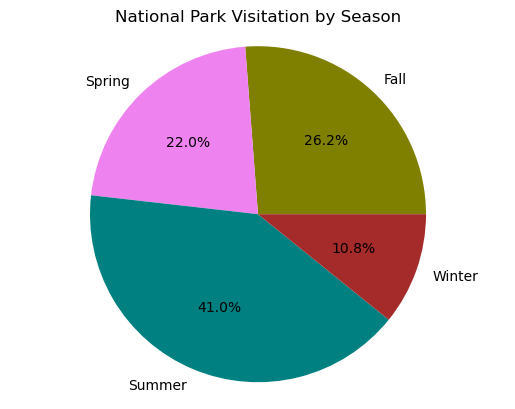

In [29]:
#KAYLA

#Calculate the total visitation for each season
season_visits = merged_df.groupby('seasons')['Recreation Visits by Month'].sum()

#Plot the pie chart
plt.pie(season_visits, labels=season_visits.index, autopct='%1.1f%%',colors=['olive', 'violet', 'gold', 'skyblue'])
plt.title('National Park Visitation by Season')
plt.axis('equal')

plt.show()
